# CRISP-DM Model with Titanic Dataset

Goal of this assignment is to apply **CRISP-DM** process model for given dataset of Titanic passengers.

In [1]:
student_name = 'Juha-Matti Hellsten'

## Business Understanding

## Objectives and Success Criteria for the Titanic Data Analysis:

### Project Objectives:
Identifying key factors influencing survival – Determining the most significant factors (demographic, socioeconomic, etc.) that correlate with passenger survival in the Titanic disaster.

Building a predictive survival model – Developing a machine learning model that can predict the probability of survival based on passenger characteristics.

Creating visualizations of survival patterns – Producing visual analyses that illustrate the impact of different factors on survival and reveal potential hidden relationships.

### Success Criteria:
Effective classification model – The model should achieve at least 80% prediction accuracy for survival on the test dataset.

Identification of statistically significant factors – Reliably identifying features that have a statistically significant correlation with survival.

Comprehensive data preprocessing – Efficiently handling missing values, creating useful new features, and optimally scaling features.

Clear and informative visualizations – Producing visualizations that effectively communicate findings and enhance understanding of survival patterns.

Thorough adherence to the CRISP-DM process – Clearly documenting all stages of the CRISP-DM model and their implementation in this analysis.

These objectives and criteria guide the analysis toward a comprehensive understanding of passenger survival on the Titanic and enable the construction of a reliable predictive model.

## Data Understanding

###  Structure of Dataset

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA ML basics\titanic.csv") 

display(df.head())

print("\nDataset shape (rows, columns):", df.shape)
print(df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset shape (rows, columns): (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


### Summary Statistics

In [3]:
print("\nBasic Statistics:")
display(df.describe(include='all'))


Basic Statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Missing Values

In [4]:
print("Missing values by columns:")
print(df.isnull().sum())

Missing values by columns:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Visualization

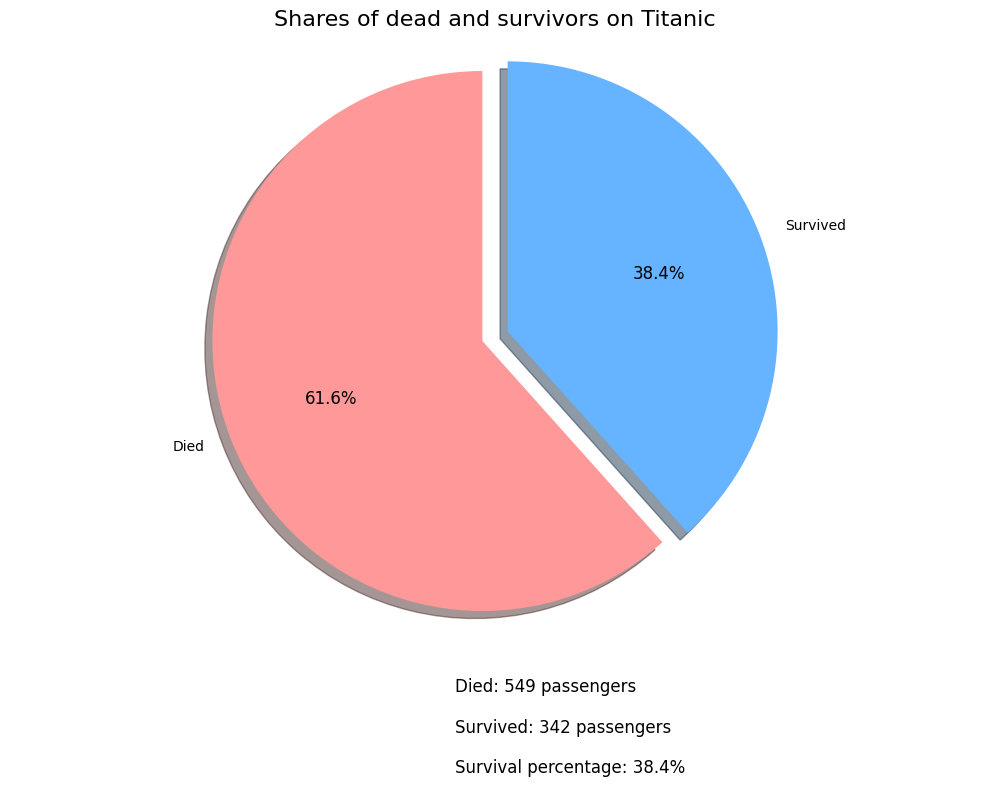

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

survived_count = df['Survived'].sum()
died_count = len(df) - survived_count

plt.figure(figsize=(10, 8))
labels = ['Died', 'Survived']
sizes = [died_count, survived_count]
colors = ['#ff9999', '#66b3ff']
explode = (0, 0.1) 

patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                                   autopct='%1.1f%%', shadow=True, startangle=90)


for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')


plt.title('Shares of dead and survivors on Titanic', fontsize=16)
plt.text(-0.1, -1.3, f"Died: {died_count} passengers", fontsize=12)
plt.text(-0.1, -1.45, f"Survived: {survived_count} passengers", fontsize=12)
plt.text(-0.1, -1.6, f"Survival percentage: {survived_count/len(df)*100:.1f}%", fontsize=12)

plt.axis('equal') 
plt.tight_layout()
plt.show()

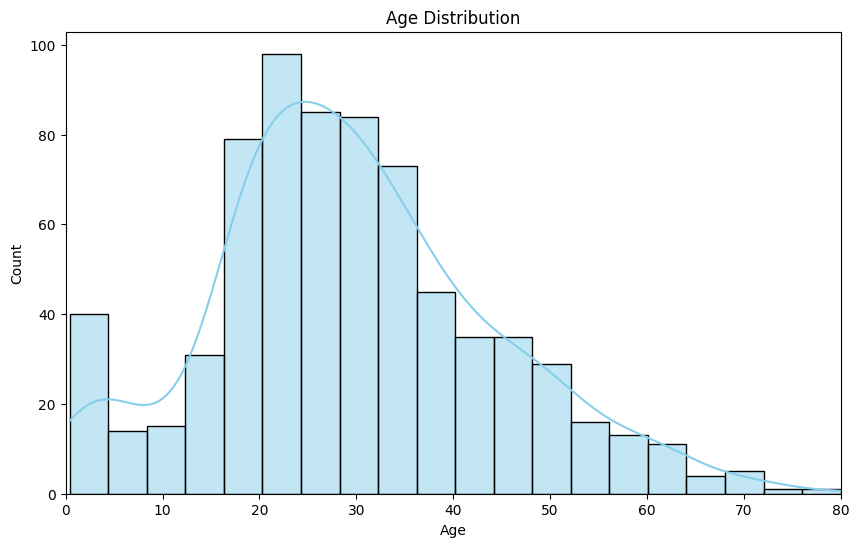

In [6]:
# Age Distribution
original_df = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA ML basics\titanic.csv")
plt.figure(figsize=(10, 6))
sns.histplot(data=original_df, x='Age', bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim(0, 80)
plt.show()

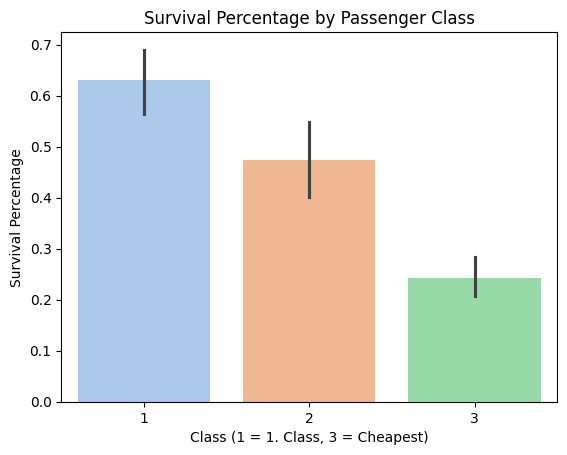

In [7]:
# Survival Percentage by Passenger Class
sns.barplot(data=df, x='Pclass', hue='Pclass', y='Survived', palette='pastel', legend=False)
plt.title("Survival Percentage by Passenger Class")
plt.xlabel("Class (1 = 1. Class, 3 = Cheapest)")
plt.ylabel("Survival Percentage")
plt.show()

Men survived: 109, died: 468
Women survived: 233, died: 81


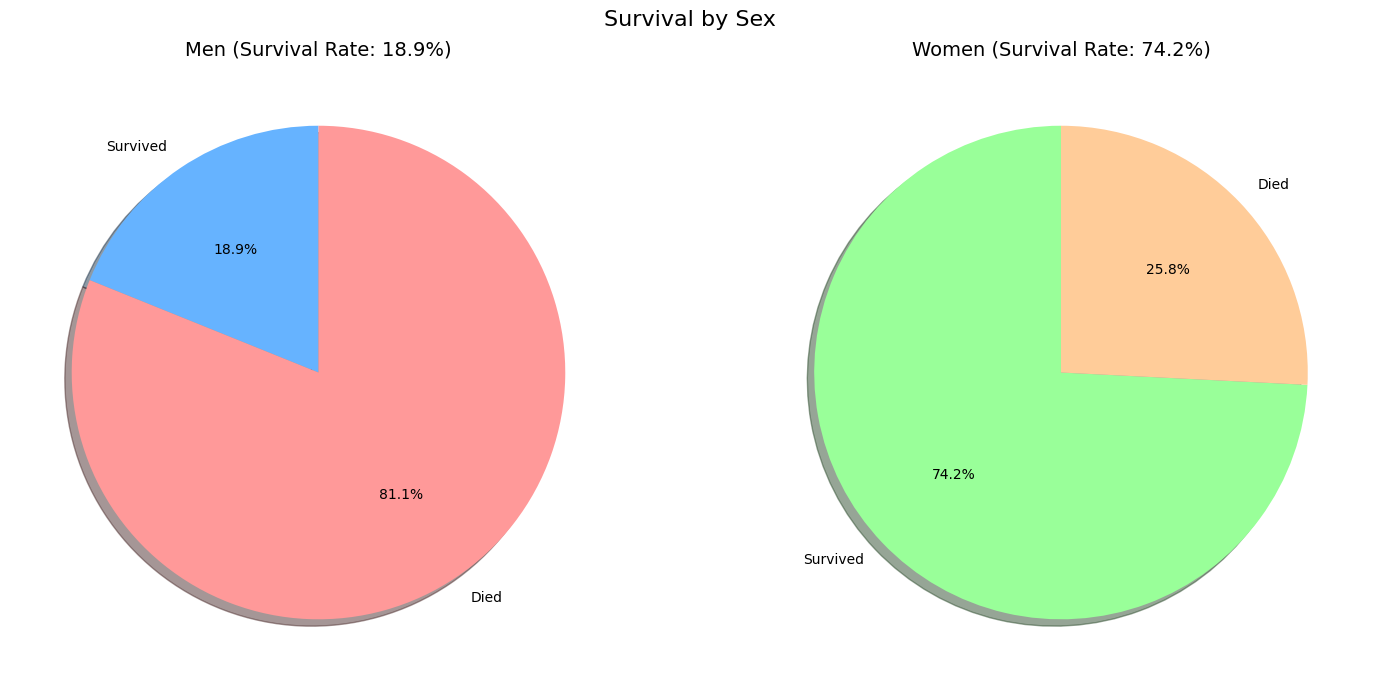

In [8]:
# Sex and Survival
survived_men = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
died_men = df[(df['Sex'] == 'male') & (df['Survived'] == 0)].shape[0]
survived_women = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
died_women = df[(df['Sex'] == 'female') & (df['Survived'] == 0)].shape[0]

print(f"Men survived: {survived_men}, died: {died_men}")
print(f"Women survived: {survived_women}, died: {died_women}")

men_survival_rate = survived_men / (survived_men + died_men) * 100
women_survival_rate = survived_women / (survived_women + died_women) * 100

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

men_labels = ['Survived', 'Died']
men_sizes = [survived_men, died_men]
men_colors = ['#66b3ff', '#ff9999']
ax1.pie(men_sizes, labels=men_labels, colors=men_colors, autopct='%1.1f%%', 
       startangle=90, shadow=True)
ax1.set_title(f'Men (Survival Rate: {men_survival_rate:.1f}%)', fontsize=14)

women_labels = ['Survived', 'Died']
women_sizes = [survived_women, died_women]
women_colors = ['#99ff99', '#ffcc99']
ax2.pie(women_sizes, labels=women_labels, colors=women_colors, autopct='%1.1f%%',
       startangle=90, shadow=True)
ax2.set_title(f'Women (Survival Rate: {women_survival_rate:.1f}%)', fontsize=14)

plt.suptitle('Survival by Sex', fontsize=16)
plt.tight_layout()
plt.show()

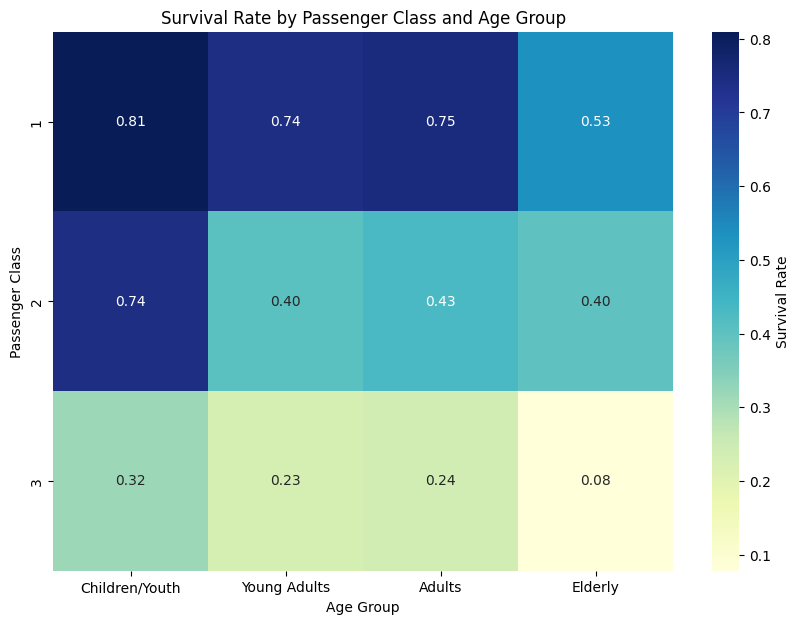

In [9]:
# Survival Rate by Passenger Class and Age Group
df_temp = df.copy()
df_temp['Age_Group'] = pd.qcut(df_temp['Age'] * 14.5 + 29.7, 4, 
                             labels=['Children/Youth', 'Young Adults', 'Adults', 'Elderly'])

survival_pivot = pd.pivot_table(df_temp, values='Survived', 
                               index='Pclass', columns='Age_Group', aggfunc='mean', observed=False)

plt.figure(figsize=(10, 7))
sns.heatmap(survival_pivot, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Survival Rate'})
plt.title('Survival Rate by Passenger Class and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Passenger Class')
plt.show()

### Outlier Detection

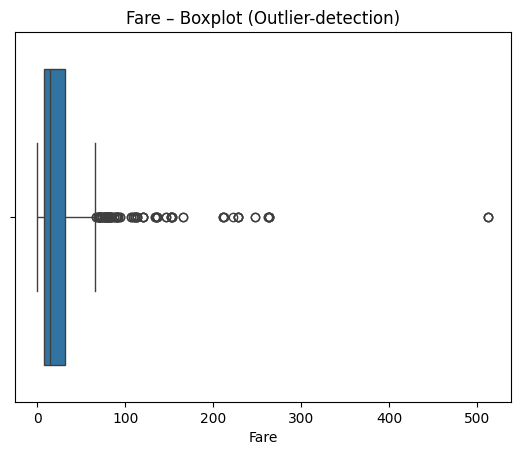

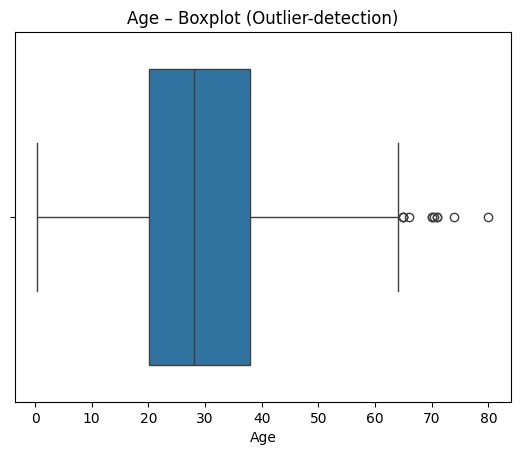

Fare Outliers: 116 rows


,Fare
679,512.3292
258,512.3292
737,512.3292
341,263.0000
438,263.0000


Age Outliers: 11 rows


,Age
630,80.0
851,74.0
96,71.0
493,71.0
116,70.5


Z-score-based Fare Outliers: 20 rows


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Fare')
plt.title("Fare – Boxplot (Outlier-detection)")
plt.show()

sns.boxplot(data=df, x='Age')
plt.title("Age – Boxplot (Outlier-detection)")
plt.show()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

fare_outliers = df[(df['Fare'] < Q1 - 1.5 * IQR) | (df['Fare'] > Q3 + 1.5 * IQR)]

print(f"Fare Outliers: {len(fare_outliers)} rows")
display(fare_outliers[['Fare']].sort_values(by='Fare', ascending=False).head())

Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

age_outliers = df[(df['Age'] < Q1_age - 1.5 * IQR_age) | (df['Age'] > Q3_age + 1.5 * IQR_age)]

print(f"Age Outliers: {len(age_outliers)} rows")
display(age_outliers[['Age']].sort_values(by='Age', ascending=False).head())

from scipy.stats import zscore

df['Fare_zscore'] = zscore(df['Fare'].fillna(df['Fare'].median()))
fare_z_outliers = df[df['Fare_zscore'].abs() > 3]

print(f"Z-score-based Fare Outliers: {len(fare_z_outliers)} rows")

## Data Preprocessing

### Handling Missing Values

In [11]:
df.isnull().sum()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

### Feature Engineering

In [12]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 
    'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])

### Visualize New Features

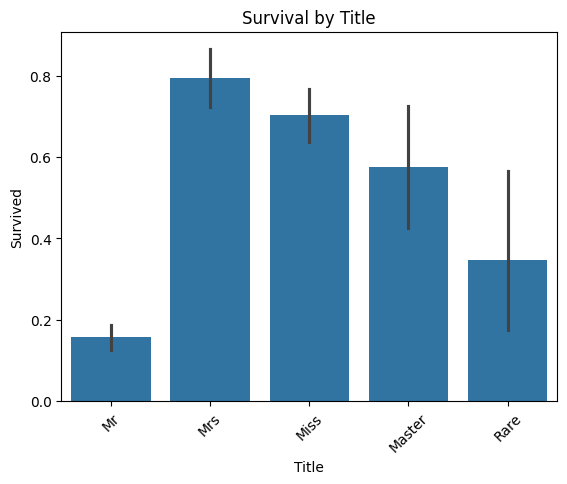

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Title', y='Survived')
plt.xticks(rotation=45)
plt.title("Survival by Title")
plt.show()

### Categorical Variable Encoding

In [14]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup'], drop_first=True)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

## Modelling

**Titanic Survival Prediction with Machine Learning**.

### Preprocessing Data for Machine Learning

In [16]:
import pandas as pd
data = pd.read_csv(r"C:\Users\jmhel\OneDrive\Työpöytä\JAMK\DA ML basics\titanic.csv")

data['Age'] = data['Age'].fillna(data['Age'].median())
data['Fare'] = data['Fare'].fillna(data['Fare'].median())

if 'Embarked' in data.columns:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
data['HasCabin'] = data['Cabin'].notnull().astype(int)

data['FareGroup'] = pd.qcut(data['Fare'], 4, labels=['Low', 'Medium', 'High', 'VeryHigh'])
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100],
                          labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])

data['Title'] = data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',
                                       'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],
                                      'Rare')

data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

categorical_columns = ['Sex', 'Embarked', 'Title', 'AgeGroup', 'FareGroup']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True, errors='ignore')

### Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Survived'])
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

### Modeling

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#### Feature importance values

                Feature  Importance
4                  Fare    0.187749
1                   Age    0.168444
7              Sex_male    0.125714
11             Title_Mr    0.106130
0                Pclass    0.062635
5            FamilySize    0.048052
6              HasCabin    0.047025
10           Title_Miss    0.039274
12            Title_Mrs    0.033284
2                 SibSp    0.033012
9            Embarked_S    0.023040
3                 Parch    0.022179
20   FareGroup_VeryHigh    0.016830
18     FareGroup_Medium    0.016517
15  AgeGroup_YoungAdult    0.015961
19       FareGroup_High    0.013608
16       AgeGroup_Adult    0.013506
8            Embarked_Q    0.008781
14        AgeGroup_Teen    0.007789
13           Title_Rare    0.007542
17      AgeGroup_Senior    0.002928


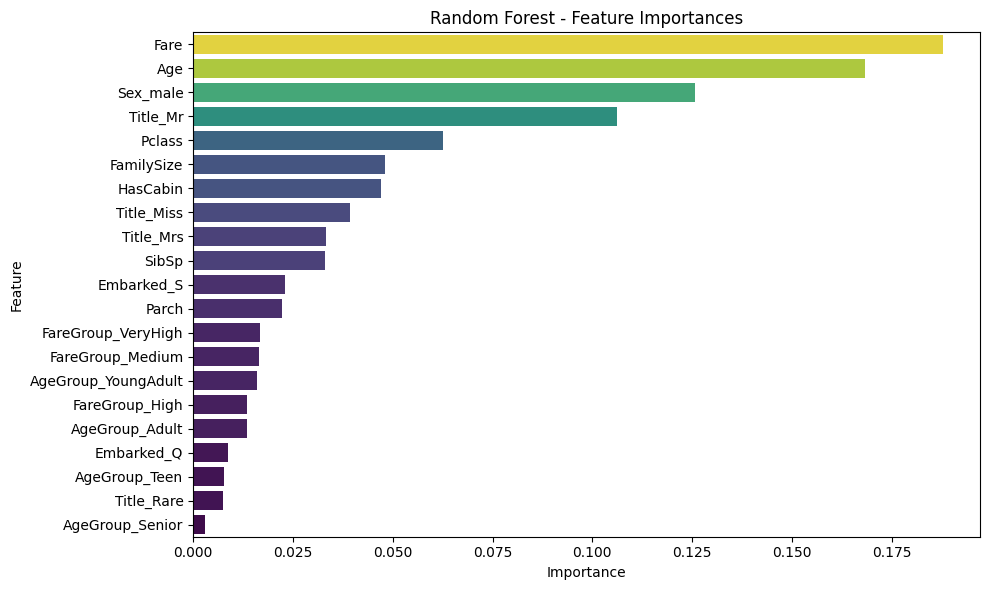

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', hue='Importance', y='Feature', data=feature_importances, palette='viridis', legend=False)
plt.title('Random Forest - Feature Importances')
plt.tight_layout()
plt.show()

### Model Evaluation

In [20]:
print("kNN Classification Report:")
print(classification_report(y_test, y_pred_knn, digits=3))

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, digits=3))

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

kNN Classification Report:
              precision    recall  f1-score   support

           0      0.737     0.791     0.763       110
           1      0.623     0.551     0.585        69

    accuracy                          0.698       179
   macro avg      0.680     0.671     0.674       179
weighted avg      0.693     0.698     0.694       179

Accuracy: 0.6983240223463687
Precision: 0.6229508196721312
F1 Score: 0.5846153846153846
Random Forest Classification Report:
              precision    recall  f1-score   support

           0      0.827     0.827     0.827       110
           1      0.725     0.725     0.725        69

    accuracy                          0.788       179
   macro avg      0.776     0.776     0.776       179
weighted avg      0.788     0.788     0.788       179

Accuracy: 0.7877094972067039
Precision: 0.7246376811594203
F1 Score: 0.7246376811594203


### Comparison

Compare the results of the classifiers.

In [21]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

comparison = pd.DataFrame({
    'Model': ['k-Nearest Neighbors', 'Random Forest'],
    'Accuracy': [knn_accuracy, rf_accuracy],
    'Precision': [knn_precision, rf_precision],
    'F1 Score': [knn_f1, rf_f1]
})

print(comparison)

                 Model  Accuracy  Precision  F1 Score
0  k-Nearest Neighbors  0.698324   0.622951  0.584615
1        Random Forest  0.787709   0.724638  0.724638


### Conclusion

Random Forest performed better in all metrics of evaluation:

RF models more complicated connections and is less sensible for noise as kNN. Also, RF produces more precise forecasts, especially when there are multiple categorical and continuous variables.

kNN might be a good baseline-model, but in this case, it does not reach the level of precision of RF.